0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Data and Parameters

In [19]:
# Reading the iris data and labels
x = np.loadtxt("iris-data.csv", delimiter=",")
y = np.loadtxt("iris-labels.csv", delimiter=",").astype(int)

# Standardize the data
max_value = np.max(x) 
data_scaled = x / max_value


# Initialize weights randomly in the interval [0, 1]
input_dim = x.shape[1]
map_dim = (40, 40) #1600 neurons
weights = np.random.rand(map_dim[0], map_dim[1], input_dim)
initial_weights = np.copy(weights) #save to plot later

# SOM parameters
learning_rate = 0.1
decay_eta=0.01
sigma= 10 #width
decay_sigma = 0.05

#training parameters
num_patterns = data_scaled.shape[0]
epochs=10

2. Neighbor and Winning Neuron Functions

In [20]:
# Compute neighbourhood function h(i,i_0) with Eq 10.18
def neighborhood_function(x, y, sigma):
    return np.exp(-np.sum((x - y) ** 2) / (2 * (sigma ** 2)))


#Winning neuron (BMU) defined by minimal angle (cosine similarity)
def find_bmu_angle(data_point, weights):
    # Calculate the cosine similarity
    similarities = np.dot(weights.reshape(-1, weights.shape[2]), data_point)
    magnitudes = np.linalg.norm(weights, axis=2).flatten() * np.linalg.norm(data_point)

    # Find the index of the winning neuron (BMU)
    winning_neuron_index = np.argmax(similarities / magnitudes)  # Maximize cosine similarity

    # Convert flat index back to 2D neuron grid
    return np.unravel_index(winning_neuron_index, weights.shape[:2])

3. Training Loop

In [21]:
# Training Loop
for epoch in range(epochs):
    # Decay parameters
    eta = learning_rate * np.exp(-decay_eta * epoch)
    sigma = sigma * np.exp(-decay_sigma * epoch)

    #batch size = 1
    for idx in range(num_patterns):
        
        #Select data point
        data_point = data_scaled[idx]

        # Find the winning neuron
        bmu = find_bmu_angle(data_point, weights)
        
        # Update weights using the learning rule Eq. 10.17
        for i in range(map_dim[0]): 
            for j in range(map_dim[1]):
                #get coordinates of winning neuron and neurons in map
                neuron_pos = np.array([i, j])
                bmu_pos = np.array(bmu)
                
                #neighborhood function h(i, i0)
                h = neighborhood_function(bmu_pos, neuron_pos, sigma)
                
                # Update weights
                weights[i, j] += eta * h * (data_point - weights[i, j])

4. Visualization

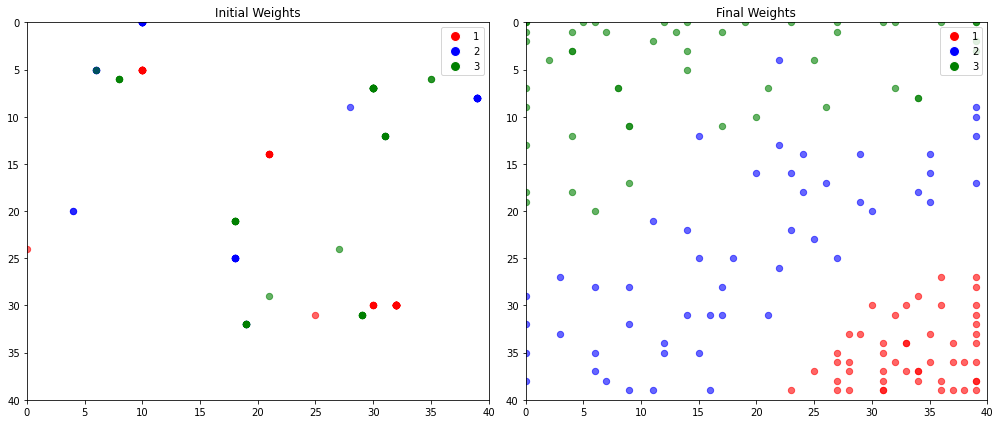

In [25]:
# Function to plot clusters based on winning neuron positions
def plot_clusters(weights, data_scaled, targets, ax, title):
    colors = ['red', 'blue', 'green']
    for idx, data_point in enumerate(data_scaled):
        bmu = find_bmu_angle(data_point, weights)
        ax.scatter(bmu[1], bmu[0], color=colors[targets[idx]], alpha=0.6, s=40)
    ax.set_title(title)
    ax.set_xlim(0, map_dim[1])
    ax.set_ylim(0, map_dim[0])
    ax.invert_yaxis()


# Visualisation: Before and After
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot initial weights clustering
plot_clusters(initial_weights, data_scaled, y, axes[0], "Initial Weights")

# Plot final weights clustering
plot_clusters(weights, data_scaled, y, axes[1], "Final Weights")

# Adding legends
classes=["1","2","3"]
for ax in axes:
    ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10, label=cls) 
                       for c, cls in zip(['red', 'blue', 'green'], classes)], loc='upper right')

plt.tight_layout()
plt.show()